In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
# Radar Chart Function
def get_radar(data):
    df = data.groupby(["speaker"]).mean()
    df['speaker'] = df.index
    for c in df.columns:
        if c !="speaker":
            normalizer = 1 / (sum(df[c]))
            df[c]=df[c].apply(lambda x : x*normalizer)

    df = df.T
    df = df.drop(labels=['speaker'], axis=0)
    df['Emotions'] = df.index
    df.reset_index(drop=True,inplace=True)

    labels=df['Emotions'].to_list()
    df.drop(columns=['Emotions'],inplace=True)
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))
    labels.append(labels[0])

    fig=plt.figure(figsize=(6,6))
    ax=fig.add_subplot(111, polar=True)
    val=[]
    col=['g','b','r','y']
    for c in range(len(df.columns)):
        if df.columns[c]!='Emotions':
            val=df[df.columns[c]].to_list()
            val.append(df[df.columns[c]].to_list()[0])
            ax.plot(angles,val, 'o-', linewidth=1, label=df.columns[c])
            ax.fill(angles, val, alpha=0.25, color=col[c])
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.title('HF_Model')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

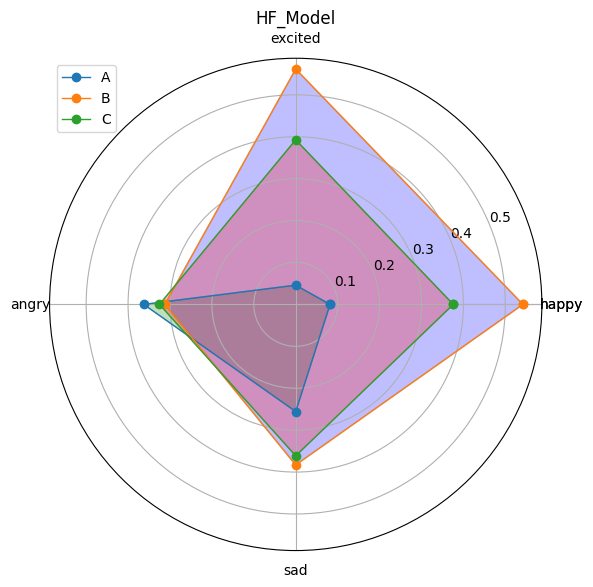

In [123]:
df = pd.read_excel("Topics/diabetes/Data/diabetes.xlsx", sheet_name="YouTube_video_2")
get_radar(df[['speaker','happy','excited','angry','sad']])